# Gradient Boosting Regression

## import libs

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

## read data

In [3]:
## grid sampling 1296
data1296 = pd.read_csv('CLEANED_gridsearch_1296.csv')
data1296 = data1296.drop(data1296.columns[0], axis=1)
X_1296 = data1296.drop('density', axis=1)
Y_1296 = data1296['density']
#print(f'{data1296}')
#print(f'{X_1296}')
#print(f'{Y_1296}')

## grid sampling 2401
data2401 = pd.read_csv('CLEANED_gridsearch_2401.csv')
data2401 = data2401.drop(data2401.columns[0], axis=1)
X_2401 = data2401.drop('density', axis=1)
Y_2401 = data2401['density']
#print(f'{data2401}')
#print(f'{X_2401}')
#print(f'{Y_2401}')

## sobol2 sampling
data_sobol1 = pd.read_csv('CLEANED_sobolsampling-2048.csv')
data_sobol1 = data_sobol1.drop(data_sobol1.columns[0], axis=1)
X_sobol1 = data_sobol1.drop('density', axis=1)
Y_sobol1 = data_sobol1['density']
#print(f'{data_sobol1}')
#print(f'{X_sobol1}')
#print(f'{Y_sobol1}')

## sobol2 sampling
data_sobol2 = pd.read_csv('CLEANED_sobolsampling-2048-2.csv')
data_sobol2 = data_sobol2.drop(data_sobol2.columns[0], axis=1)
X_sobol2 = data_sobol2.drop('density', axis=1)
Y_sobol2 = data_sobol2['density']
#print(f'{data_sobol2}')
#print(f'{X_sobol2}')
#print(f'{Y_sobol2}')

## prepare data

In [4]:
## randomly generated numbers (different script) taken for different random states
random_ints = [46, 40, 23, 29, 14, 78, 55, 33, 1, 61, 62, 39, 9, 25, 96, 95, 28, 27, 51, 0, 4, 39, 12, 41, 94, 70, 50, 18, 77, 37]
#print(f'{np.sort(random_ints)}')

In [6]:
## grid sampling 1296
X_TRAINs1296 = []
X_TESTs1296 = []
Y_TRAINs1296 = []
Y_TESTs1296 = []

## grid sampling 2401
X_TRAINs2401 = []
X_TESTs2401 = []
Y_TRAINs2401 = []
Y_TESTs2401 = []

## sobol sampling 1
X_TRAINsSobol1 = []
X_TESTsSobol1 = []
Y_TRAINsSobol1 = []
Y_TESTsSobol1 = []

## sobol sampling 2
X_TRAINsSobol2 = []
X_TESTsSobol2 = []
Y_TRAINsSobol2 = []
Y_TESTsSobol2 = []
    
for i in random_ints:
    #print(f'{i}')
    ## use the X_test, Y_test data for testing combined with all the data of the other datasets
    X_train, X_test, Y_train, Y_test = train_test_split(X_1296, Y_1296, test_size=0.05, random_state=i)
    X_TRAINs1296.append(X_train)
    Y_TRAINs1296.append(Y_train)
    #print(f'{X_test}')
    #print(f'{Y_test}')
    X_test = pd.concat([X_test, X_2401, X_sobol1, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_2401, Y_sobol1, Y_sobol2], ignore_index=True)
    X_TESTs1296.append(X_test)
    Y_TESTs1296.append(Y_test)
    #print(f'{X_test}')
    #print(f'{Y_test}')
    
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_2401, Y_2401, test_size=0.05, random_state=i)
    X_TRAINs2401.append(X_train),
    Y_TRAINs2401.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_sobol1, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_sobol1, Y_sobol2], ignore_index=True)
    X_TESTs2401.append(X_test)
    Y_TESTs2401.append(Y_test)
    
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol1, Y_sobol1, test_size=0.05, random_state=i)
    X_TRAINsSobol1.append(X_train)
    Y_TRAINsSobol1.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_2401, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol2], ignore_index=True)
    X_TESTsSobol1.append(X_test)
    Y_TESTsSobol1.append(Y_test)
    
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol2, Y_sobol2, test_size=0.05, random_state=i)
    X_TRAINsSobol2.append(X_train)
    Y_TRAINsSobol2.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_2401, X_sobol1], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol1], ignore_index=True)
    X_TESTsSobol2.append(X_test)
    Y_TESTsSobol2.append(Y_test)


## train and evaluate models

In [7]:
## grid sampling 1296
MODELs1296 = []
Y_PREDICTIONs1296 = []
RMSEs1296 = []
R2s1296 = []
SPEARMANRs1296 = []

## grid sampling 2401
MODELs2401 = []
Y_PREDICTIONs2401 = []
RMSEs2401 = []
R2s2401 = []
SPEARMANRs2401 = []

## sobol sampling 1
MODELsSobol1 = []
Y_PREDICTIONsSobol1 = []
RMSEsSobol1 = []
R2sSobol1 = []
SPEARMANRsSobol1 = []

## sobol sampling 2
MODELsSobol2 = []
Y_PREDICTIONsSobol2 = []
RMSEsSobol2 = []
R2sSobol2 = []
SPEARMANRsSobol2 = []
    
for i in range(0, len(random_ints)):
    print(f'\t{i+1}/{len(random_ints)}')
    ## create the model
    model1296 = LGBMRegressor(random_state=random_ints[i])
    #
    model2401 = LGBMRegressor(random_state=random_ints[i])
    #
    modelSobol1 = LGBMRegressor(random_state=random_ints[i])
    #
    modelSobol2 = LGBMRegressor(random_state=random_ints[i])
    
    ## train/fit the model
    model1296.fit(X_TRAINs1296[i], Y_TRAINs1296[i])
    MODELs1296.append(model1296)
    #
    model2401.fit(X_TRAINs2401[i], Y_TRAINs2401[i])
    MODELs2401.append(model2401)
    #
    modelSobol1.fit(X_TRAINsSobol1[i], Y_TRAINsSobol1[i])
    MODELsSobol1.append(modelSobol1)
    #
    modelSobol2.fit(X_TRAINsSobol2[i], Y_TRAINsSobol2[i])
    MODELsSobol2.append(modelSobol2)
    
    ## prediction using the test set
    Y_prediction1296 = model1296.predict(X_TESTs1296[i])
    Y_PREDICTIONs1296.append(Y_prediction1296)
    #
    Y_prediction2401 = model2401.predict(X_TESTs2401[i])
    Y_PREDICTIONs2401.append(Y_prediction2401)
    #
    Y_predictionSobol1 = modelSobol1.predict(X_TESTsSobol1[i])
    Y_PREDICTIONsSobol1.append(Y_predictionSobol1)
    #
    Y_predictionSobol2 = modelSobol2.predict(X_TESTsSobol2[i])
    Y_PREDICTIONsSobol2.append(Y_predictionSobol2)
    
    ## evaluate with Y_test
    rmse1296 = np.sqrt(mean_squared_error(Y_TESTs1296[i], Y_prediction1296))
    r21296 = r2_score(Y_TESTs1296[i], Y_prediction1296)
    spearman_r1296 = stats.spearmanr(Y_TESTs1296[i], Y_prediction1296)
    RMSEs1296.append(rmse1296)
    R2s1296.append(r21296)
    SPEARMANRs1296.append(spearman_r1296.statistic)
    #
    rmse2401 = np.sqrt(mean_squared_error(Y_TESTs2401[i], Y_prediction2401))
    r22401 = r2_score(Y_TESTs2401[i], Y_prediction2401)
    spearman_r2401 = stats.spearmanr(Y_TESTs2401[i], Y_prediction2401)
    RMSEs2401.append(rmse2401)
    R2s2401.append(r22401)
    SPEARMANRs2401.append(spearman_r2401.statistic)
    #
    rmseSobol1 = np.sqrt(mean_squared_error(Y_TESTsSobol1[i], Y_predictionSobol1))
    r2Sobol1 = r2_score(Y_TESTsSobol1[i], Y_predictionSobol1)
    spearman_rSobol1 = stats.spearmanr(Y_TESTsSobol1[i], Y_predictionSobol1)
    RMSEsSobol1.append(rmseSobol1)
    R2sSobol1.append(r2Sobol1)
    SPEARMANRsSobol1.append(spearman_rSobol1.statistic)
    #
    rmseSobol2 = np.sqrt(mean_squared_error(Y_TESTsSobol2[i], Y_predictionSobol2))
    r2Sobol2 = r2_score(Y_TESTsSobol2[i], Y_predictionSobol2)
    spearman_rSobol2 = stats.spearmanr(Y_TESTsSobol2[i], Y_predictionSobol2)
    RMSEsSobol2.append(rmseSobol2)
    R2sSobol2.append(r2Sobol2)
    SPEARMANRsSobol2.append(spearman_rSobol2.statistic)

print(f'done.\n')

	1/30
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 1060, number of used features: 4
[LightGBM] [Info] Start training from score 676.102529
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 1674, number of used features: 4
[LightGBM] [Info] Start training from score 699.552487
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

## calculate RMSE/R2/SpearmanRank

In [8]:
## grid sampling 1296
rmse1296_mean = np.mean(RMSEs1296)
#
r21296_mean = np.mean(R2s1296)
#
spearmanr1296_mean = np.mean(SPEARMANRs1296)

## grid sampling 2401
rmse2401_mean = np.mean(RMSEs2401)
#
r22401_mean = np.mean(R2s2401)
#
spearmanr2401_mean = np.mean(SPEARMANRs2401)

## Sobol 1
rmseSobol1_mean = np.mean(RMSEsSobol1)
#
r2Sobol1_mean = np.mean(R2sSobol1)
#
spearmanrSobol1_mean = np.mean(SPEARMANRsSobol1)

## Sobol 2
rmseSobol2_mean = np.mean(RMSEsSobol2)
#
r2Sobol2_mean = np.mean(R2sSobol2)
#
spearmanrSobol2_mean = np.mean(SPEARMANRsSobol2)


In [12]:
## Grid1296
print(f'avg. RMSE: {rmse1296_mean}')
print(f'Std Dev: {np.std(RMSEs1296)}')
print(f'avg. R2: {r21296_mean}')
print(f'Std Dev: {np.std(R2s1296)}')
print(f'avg. R2: {spearmanr1296_mean}')
print(f'Std Dev: {np.std(SPEARMANRs1296)}\n')
#
## Grid2401
print(f'avg. RMSE: {rmse2401_mean}')
print(f'Std Dev: {np.std(RMSEs2401)}')
print(f'avg. R2: {r22401_mean}')
print(f'Std Dev: {np.std(R2s2401)}')
print(f'avg. R2: {spearmanr2401_mean}')
print(f'Std Dev: {np.std(SPEARMANRs2401)}\n')
#
## Sobol-1
print(f'avg. RMSE: {rmseSobol1_mean}')
print(f'Std Dev: {np.std(RMSEsSobol1)}')
print(f'avg. R2: {r2Sobol1_mean}')
print(f'Std Dev: {np.std(R2sSobol1)}')
print(f'avg. R2: {spearmanrSobol1_mean}')
print(f'Std Dev: {np.std(SPEARMANRsSobol1)}\n')
#
## Sobol-2
print(f'avg. RMSE: {rmseSobol2_mean}')
print(f'Std Dev: {np.std(RMSEsSobol2)}')
print(f'avg. R2: {r2Sobol2_mean}')
print(f'Std Dev: {np.std(R2sSobol2)}')
print(f'avg. R2: {spearmanrSobol2_mean}')
print(f'Std Dev: {np.std(SPEARMANRsSobol2)}\n')

avg. RMSE: 41.074596751857335
Std Dev: 0.5118919973403516
avg. R2: 0.8376566984672261
Std Dev: 0.003962206440541206
avg. R2: 0.9394854865686838
Std Dev: 0.0004497374897237312

avg. RMSE: 75.40515241057379
Std Dev: 2.153188004574875
avg. R2: 0.4846212490623397
Std Dev: 0.03065227093170437
avg. R2: 0.8517418002588244
Std Dev: 0.024958133314669464

avg. RMSE: 20.314087295929035
Std Dev: 0.1505918092557568
avg. R2: 0.9519066356439787
Std Dev: 0.0007653639284990226
avg. R2: 0.9731635883324302
Std Dev: 0.000833904078878406

avg. RMSE: 17.85327794079871
Std Dev: 0.32884107014906594
avg. R2: 0.9619906100728669
Std Dev: 0.001447263416286727
avg. R2: 0.9735932232378511
Std Dev: 0.0010781522909924927



## plot RMSE/R2S/SpearmanRank

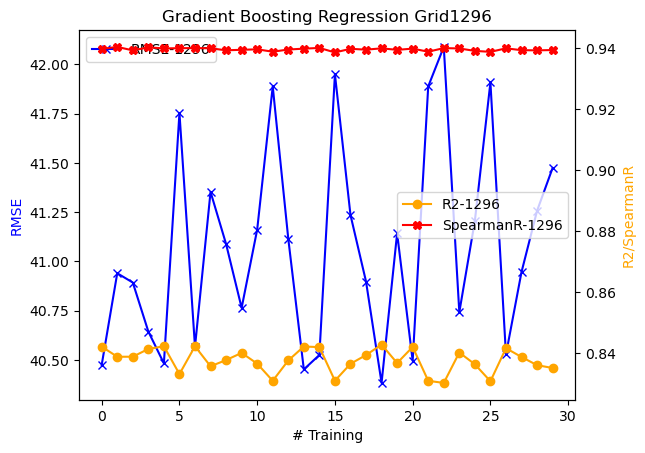

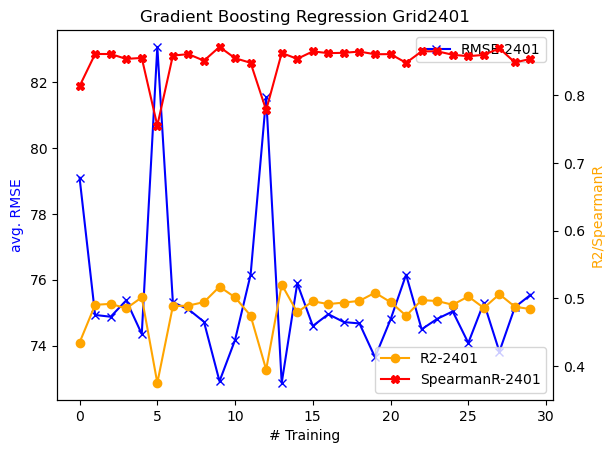

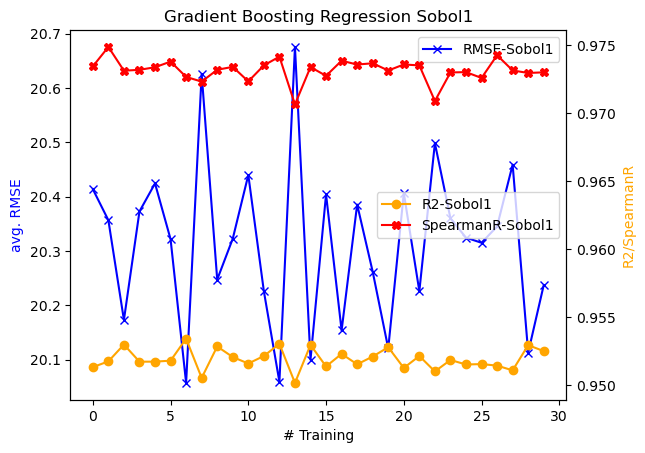

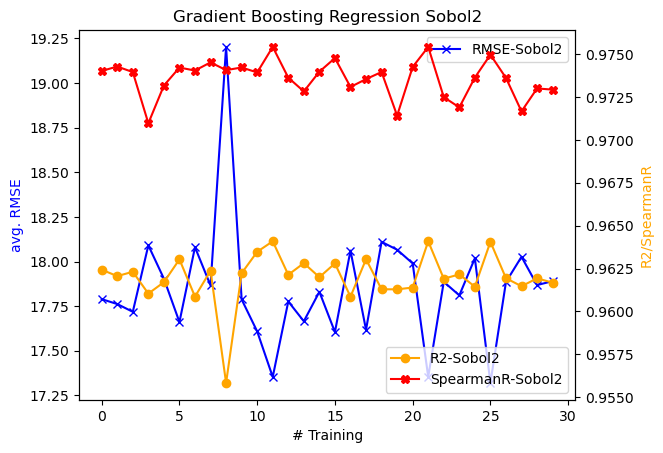

In [10]:
## Grid Sampling 1296
fig, ax1 = plt.subplots()
ax1.plot(RMSEs1296, '-x', color='blue', label='RMSE-1296')
ax1.set_xlabel('# Training')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()
plt.title('Gradient Boosting Regression Grid1296')

ax2 = ax1.twinx()
ax2.plot(R2s1296, '-o', color='orange', label='R2-1296')
ax2.plot(SPEARMANRs1296, '-X', color='red', label='SpearmanR-1296')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
#fig.savefig('RF_GRID1296_test-trainingsize.png')


## Grid Sampling 2401
fig, ax1 = plt.subplots()
ax1.plot(RMSEs2401, '-x', color='blue', label='RMSE-2401')
ax1.set_xlabel('# Training')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Gradient Boosting Regression Grid2401')

ax2 = ax1.twinx()
ax2.plot(R2s2401, '-o', color='orange', label='R2-2401')
ax2.plot(SPEARMANRs2401, '-X', color='red', label='SpearmanR-2401')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
#fig.savefig('RF_GRID2401_test-trainingsize.png')


## Sobol 1
fig, ax1 = plt.subplots()
ax1.plot(RMSEsSobol1, '-x', color='blue', label='RMSE-Sobol1')
ax1.set_xlabel('# Training')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Gradient Boosting Regression Sobol1')

ax2 = ax1.twinx()
ax2.plot(R2sSobol1, '-o', color='orange', label='R2-Sobol1')
ax2.plot(SPEARMANRsSobol1, '-X', color='red', label='SpearmanR-Sobol1')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
#fig.savefig('RF_Sobol-1_test-trainingsize.png')


## Sobol 2
fig, ax1 = plt.subplots()
ax1.plot(RMSEsSobol2, '-x', color='blue', label='RMSE-Sobol2')
ax1.set_xlabel('# Training')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Gradient Boosting Regression Sobol2')

ax2 = ax1.twinx()
ax2.plot(R2sSobol2, '-o', color='orange', label='R2-Sobol2')
ax2.plot(SPEARMANRsSobol2, '-X', color='red', label='SpearmanR-Sobol2')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
#fig.savefig('RF_Sobol-2_test-trainingsize.png')